Create and Art with Neural style transfer on given image using deep learning

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path, img_height, img_width):
 img = keras_image.load_img(image_path, target_size=(img_height, img_width))
 img = keras_image.img_to_array(img)
 img = np.expand_dims(img, axis=0)
 img = vgg19.preprocess_input(img)
 return img

In [3]:
# Function to convert a tensor into a valid image
def tensor_to_image(tensor):
 tensor = tensor * 255
 tensor = np.clip(tensor, 0, 255).astype('uint8')
 return tensor[0]


In [6]:
# Define paths to style and content images using raw string (r-prefix) or escaped backslashes
style_image_path = r'Art1.jpg'
content_image_path = r'Art1.jpg'
# Constants for image dimensions
img_height = 400
img_width = 400

In [7]:
# Load style and content images
style_image = load_and_preprocess_image(style_image_path, img_height, img_width)
content_image = load_and_preprocess_image(content_image_path, img_height, img_width)
import tensorflow as tf
def style_loss(style_targets, style_outputs):
 loss = tf.zeros(shape=()) # Initialize loss tensor
 num_layers = len(style_targets) # Number of style layers
 for i in range(num_layers):
  target_features = style_targets[i]
  output_features = style_outputs[i]
 # Compute Gram matrices for target and output features
  target_gram_matrix = gram_matrix(target_features)
  output_gram_matrix = gram_matrix(output_features)
 # Compute mean squared difference between Gram matrices
  layer_loss = tf.reduce_mean(tf.square(target_gram_matrix - output_gram_matrix))

 # Accumulate layer loss
  loss += layer_loss

 # Average loss across all style layers
 total_loss = loss / float(num_layers)

 return total_loss

In [8]:
def gram_matrix(tensor):
 # Get shape of the tensor (batch_size, height, width, channels)
 batch_size, height, width, channels = tensor.get_shape().as_list()

 # Reshape tensor to combine batch_size and spatial dimensions
 reshaped_tensor = tf.reshape(tensor, [batch_size * height * width, channels])

 # Compute Gram matrix: A^T * A where A is the reshaped tensor
 gram = tf.matmul(reshaped_tensor, reshaped_tensor, transpose_a=True)

 # Normalize Gram matrix by the number of elements
 num_elements = tf.cast(batch_size * height * width * channels, tf.float32)
 gram /= num_elements

 return gram


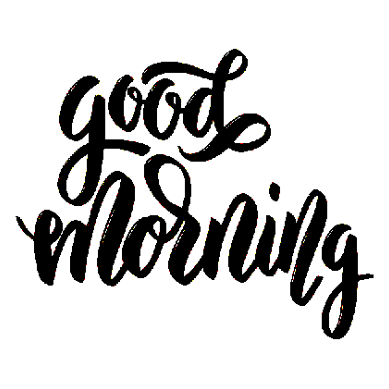

In [9]:
# Use tf.Variable to create a trainable image (initialized with content image)
generated_image = tf.Variable(content_image, dtype=tf.float32)
# Optimizer and training loop
optimizer = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
# Convert the final generated image tensor to a valid image
final_image = tensor_to_image(generated_image.numpy())
# Display the final stylized image
plt.imshow(final_image)
plt.axis('off')
plt.show()


- Neural Style Transfer is an optimization technique used to blend the content of one image with the style of another image, creating a new image that looks like the content image but is “painted” in the style of the style image.

- NST allows us to create unique and artistic images by blending content and style.